<a href="https://colab.research.google.com/github/lkp123/Coursera1/blob/main/Computing_for_AMS_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [562]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [563]:
def read_data(fileid):
    stringvariables=["LOAN_ID","CHANNEL", "FIRST_TIME_HOME_BUYER_IND",
                  "LOAN_PURPOSE", "PROPERTY_TYPE", "OCCUPANCY_STATUS",
                  "PROPERTY_STATE", "ZIP_CODE_SHORT"]
    floatvariables=["NUMBER_OF_UNITS","FORECLOSURE","LTV",
                   "NUMBER_OF_BORROWERS","DTI","LOAN_AGE",
                   "REM_MONTHS_LEGAL_MATURITY", "REM_MONTHS_MATURITY",
                   "ORIGINAL_LOAN_TERM", "CLTV",
                   "B_CREDIT_SCORE_O","CB_CREDIT_SCORE_O", "NMONTHS",
                   "MSA","MORTGAGE_INSURANCE_PERCENTAGE",
                   "ORIGINAL_INTEREST_RATE", "CURRENT_INTEREST_RATE",
                   "ORIGINAL_UPB"]
    datevariables=["MONTHLY_REPORTING_PERIOD",
                   "ORIGINATION_DATE",
                   "FIRST_PAYMENT_DATE",
                   "MATURITY_DATE"]
    objectvariables=stringvariables + datevariables
    dtypes={}
    for s in objectvariables:
        dtypes[s]="object"
    for s in floatvariables:
        dtypes[s]="float"
    na_strings=["".join([" " for j in range(m)]) for m in range(10)]
    df=pd.read_csv(fileid,dtype=dtypes,na_values=na_strings)
    for datevar in datevariables:
        df[datevar]=pd.to_datetime(df[datevar],format="%m%Y")
    return(df)

In [564]:
df = read_data('/content/trainBATG.csv')

In [565]:
df.shape

(250000, 30)

In [566]:
df.head()

,LOAN_ID,MONTHLY_REPORTING_PERIOD,CHANNEL,ORIGINAL_INTEREST_RATE,CURRENT_INTEREST_RATE,ORIGINAL_UPB,ORIGINAL_LOAN_TERM,ORIGINATION_DATE,FIRST_PAYMENT_DATE,LOAN_AGE,...,LOAN_PURPOSE,PROPERTY_TYPE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,PROPERTY_STATE,MSA,ZIP_CODE_SHORT,MORTGAGE_INSURANCE_PERCENTAGE,FORECLOSURE,NMONTHS
0,FGJABEAEFEEA,2000-05-01,R,8.25,8.25,75000.0,360.0,2000-04-01,2000-06-01,0.0,...,P,SF,1.0,P,IL,16980.0,606,NaN,0.0,32.0
1,DJGCJHBHFJAB,2003-06-01,R,5.00,5.00,72000.0,180.0,2003-04-01,2003-06-01,1.0,...,R,SF,1.0,P,CO,19740.0,801,NaN,0.0,179.0
2,JGDEGGBCGJJD,2001-08-01,C,7.75,7.75,273000.0,360.0,2001-07-01,2001-08-01,1.0,...,P,SF,1.0,P,NJ,35620.0,085,NaN,0.0,4.0
3,IHGHJEEDGEBB,2004-07-01,R,6.75,6.75,73000.0,360.0,2004-05-01,2004-07-01,1.0,...,P,SF,1.0,I,FL,29460.0,338,25.0,0.0,110.0
4,EFHFBJAEHJJI,2002-01-01,R,6.25,6.25,38000.0,180.0,2001-12-01,2002-03-01,-1.0,...,C,SF,1.0,P,MI,19820.0,484,NaN,0.0,140.0


In [567]:
df['MONTHLY_REPORTING_PERIOD'].head()

,MONTHLY_REPORTING_PERIOD
0,2000-05-01
1,2003-06-01
2,2001-08-01
3,2004-07-01
4,2002-01-01


In [568]:
df['CHANNEL'].nunique()
df['CHANNEL'].unique()

array(['R', 'C', 'B'], dtype=object)

In [569]:
df['FIRST_TIME_HOME_BUYER_IND'].nunique()
df['FIRST_TIME_HOME_BUYER_IND'].unique()

array(['N', 'Y', nan], dtype=object)

In [570]:
df['OCCUPANCY_STATUS'].nunique()
df['OCCUPANCY_STATUS'].unique()

array(['P', 'I', 'S'], dtype=object)

In [571]:
df['PROPERTY_STATE'].nunique()
df['PROPERTY_STATE'].unique()

array(['IL', 'CO', 'NJ', 'FL', 'MI', 'CA', 'MA', 'UT', 'WI', 'NC', 'AR',
       'AZ', 'SC', 'MD', 'GA', 'LA', 'MN', 'DC', 'TX', 'NY', 'TN', 'OR',
       'PA', 'VA', 'WA', 'VT', 'CT', 'WY', 'AL', 'IN', 'NM', 'DE', 'SD',
       'ID', 'OK', 'KY', 'HI', 'MO', 'OH', 'MS', 'PR', 'ME', 'NV', 'IA',
       'RI', 'WV', 'NE', 'KS', 'NH', 'MT', 'ND', 'AK', 'GU', 'VI'],
      dtype=object)

In [572]:
df['ZIP_CODE_SHORT'].nunique()
df['ZIP_CODE_SHORT'].unique()

array(['606', '801', '085', '338', '484', '922', '921', '956', '021',
       '844', '532', '286', '727', '729', '863', '928', '290', '207',
       '481', '310', '713', '810', '553', '200', '550', '750', '900',
       '852', '115', '142', '378', '940', '330', '543', '934', '972',
       '853', '704', '494', '189', '241', '982', '018', '370', '313',
       '210', '864', '907', '925', '020', '486', '334', '083', '054',
       '068', '300', '611', '773', '080', '534', '232', '991', '825',
       '480', '917', '321', '840', '352', '558', '460', '604', '923',
       '971', '980', '539', '331', '309', '883', '197', '339', '945',
       '600', '023', '284', '220', '015', '219', '572', '850', '201',
       '234', '960', '366', '333', '957', '231', '317', '380', '837',
       '470', '019', '497', '762', '730', '489', '323', '776', '809',
       '216', '719', '211', '403', '927', '967', '981', '657', '952',
       '103', '954', '272', '445', '490', '112', '857', '386', '906',
       '575', '017',

In [573]:
nan_counts = df.isna().sum()
print("Number of NaNs in each column:")
print(nan_counts)

Number of NaNs in each column:
LOAN_ID                               0
MONTHLY_REPORTING_PERIOD              0
CHANNEL                               0
ORIGINAL_INTEREST_RATE                0
CURRENT_INTEREST_RATE                 2
ORIGINAL_UPB                          0
ORIGINAL_LOAN_TERM                    0
ORIGINATION_DATE                      0
FIRST_PAYMENT_DATE                    0
LOAN_AGE                              2
REM_MONTHS_LEGAL_MATURITY             2
REM_MONTHS_MATURITY                   2
MATURITY_DATE                         2
LTV                                   0
CLTV                               5356
NUMBER_OF_BORROWERS                 170
DTI                                8960
B_CREDIT_SCORE_O                   2020
CB_CREDIT_SCORE_O                134678
FIRST_TIME_HOME_BUYER_IND           242
LOAN_PURPOSE                          0
PROPERTY_TYPE                         0
NUMBER_OF_UNITS                       0
OCCUPANCY_STATUS                      0
PROPERTY_

In [574]:
df.iloc[:,-1].mean()

57.106612

In [575]:
value_counts = df.iloc[:, -2].value_counts()
print(value_counts)

FORECLOSURE
0.0    244121
1.0      5879
Name: count, dtype: int64


## **Analysing the test data**

In [576]:
df_test = read_data('/content/test_predsBATG.csv')

In [577]:
df_test.shape


(100000, 28)

In [578]:
df_test.head()

,LOAN_ID,MONTHLY_REPORTING_PERIOD,CHANNEL,ORIGINAL_INTEREST_RATE,CURRENT_INTEREST_RATE,ORIGINAL_UPB,ORIGINAL_LOAN_TERM,ORIGINATION_DATE,FIRST_PAYMENT_DATE,LOAN_AGE,...,CB_CREDIT_SCORE_O,FIRST_TIME_HOME_BUYER_IND,LOAN_PURPOSE,PROPERTY_TYPE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,PROPERTY_STATE,MSA,ZIP_CODE_SHORT,MORTGAGE_INSURANCE_PERCENTAGE
0,BICGHBJHDBAA,2002-02-01,B,7.250,7.250,211000.0,360.0,2002-01-01,2002-03-01,0.0,...,670.0,N,R,SF,1.0,P,NJ,35620.0,076,25.0
1,JIGECHDCHGCD,2002-01-01,C,6.375,6.375,186000.0,360.0,2001-12-01,2002-02-01,0.0,...,724.0,N,P,SF,1.0,P,WI,33340.0,531,NaN
2,DIIDGEJAEEFF,2002-07-01,C,6.625,6.625,251000.0,360.0,2002-06-01,2002-08-01,0.0,...,NaN,N,P,SF,1.0,P,OH,18140.0,430,25.0
3,JEJAGDGGJCCH,2001-05-01,R,6.625,6.625,92000.0,360.0,2001-04-01,2001-06-01,0.0,...,NaN,N,P,SF,1.0,P,MI,19820.0,480,NaN
4,FJFFJGFFDDJF,2002-02-01,C,6.750,6.750,60000.0,360.0,2001-12-01,2002-02-01,1.0,...,NaN,N,R,SF,1.0,P,IN,33140.0,463,25.0


In [579]:
df_test['MONTHLY_REPORTING_PERIOD'].head()

,MONTHLY_REPORTING_PERIOD
0,2002-02-01
1,2002-01-01
2,2002-07-01
3,2001-05-01
4,2002-02-01


In [580]:
df_test['CHANNEL'].nunique()
df_test['CHANNEL'].unique()

array(['B', 'C', 'R'], dtype=object)

In [581]:
nan_counts_test = df_test.isna().sum()
print("Number of NaNs in each column for df_test:")
nan_counts_test

Number of NaNs in each column for df_test:


,0
LOAN_ID,0
MONTHLY_REPORTING_PERIOD,0
CHANNEL,0
ORIGINAL_INTEREST_RATE,0
CURRENT_INTEREST_RATE,0
ORIGINAL_UPB,0
ORIGINAL_LOAN_TERM,0
ORIGINATION_DATE,0
FIRST_PAYMENT_DATE,0
LOAN_AGE,0


# **Back to train data now**

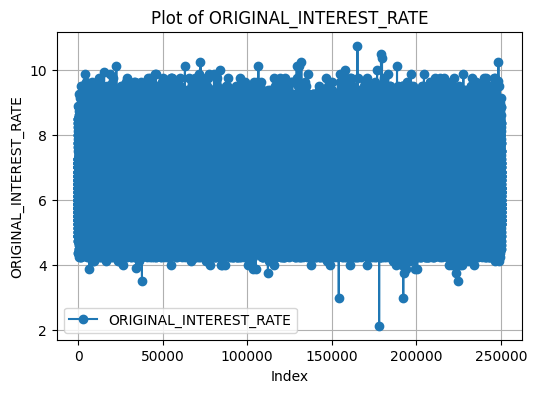

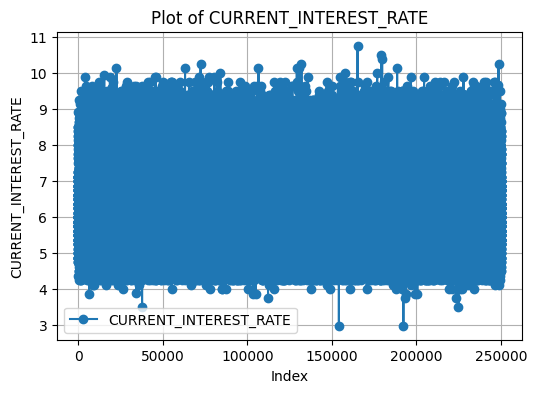

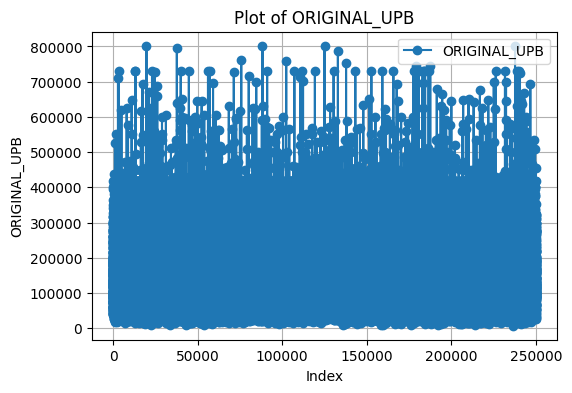

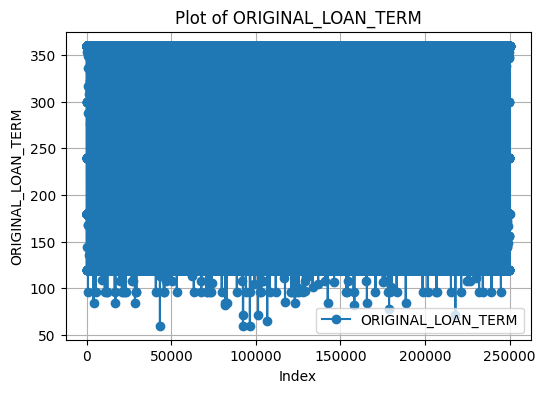

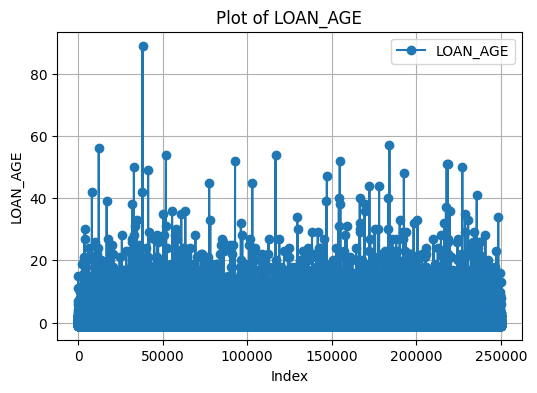

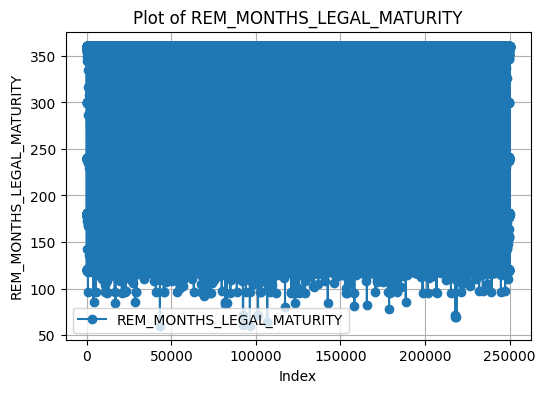

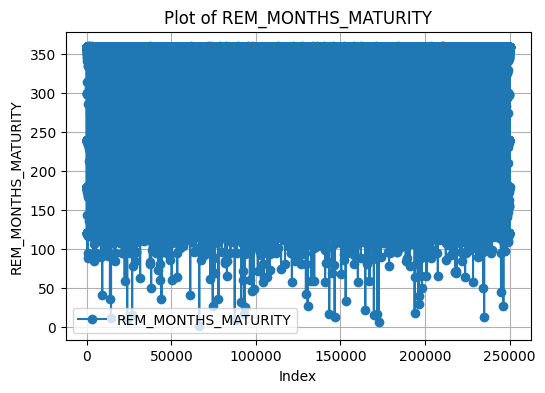

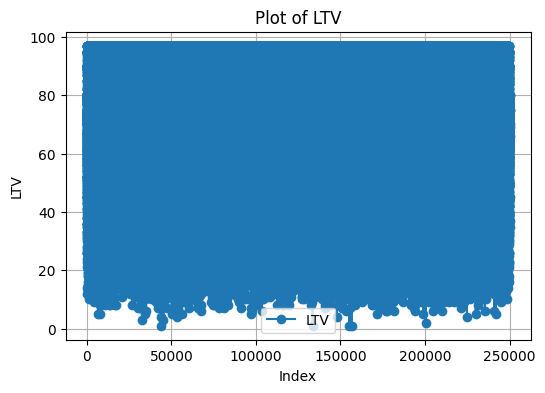

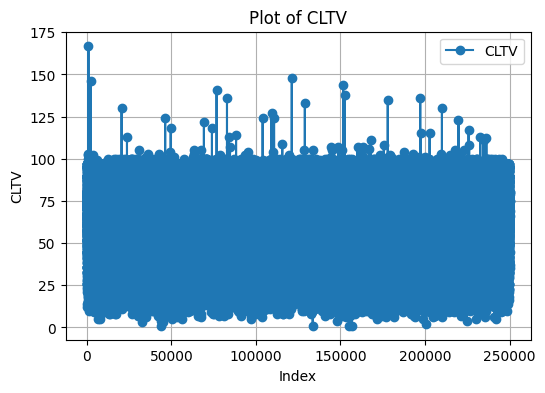

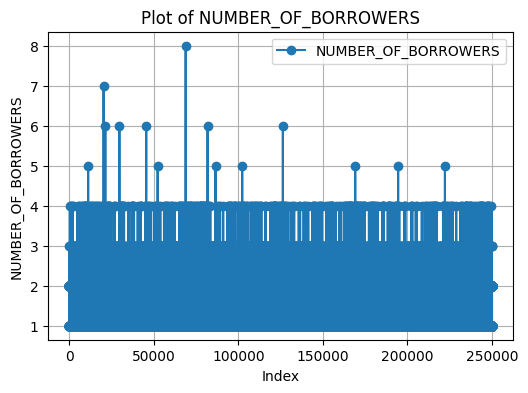

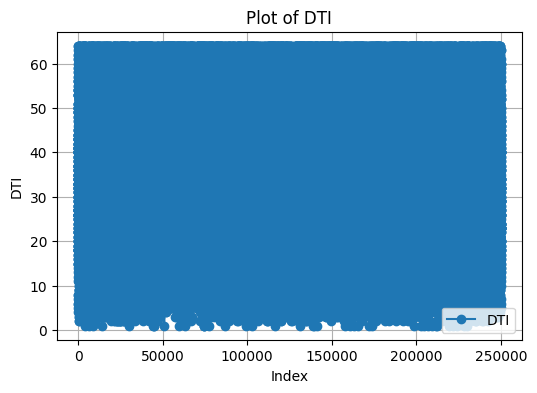

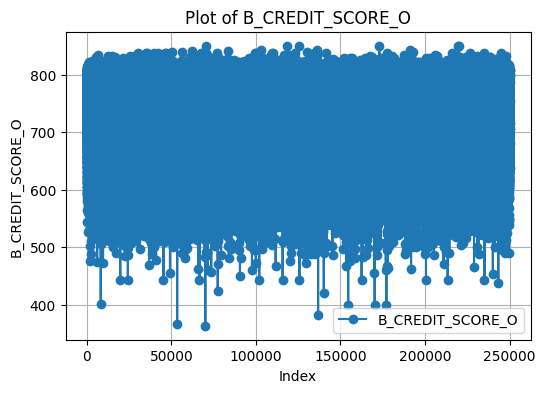

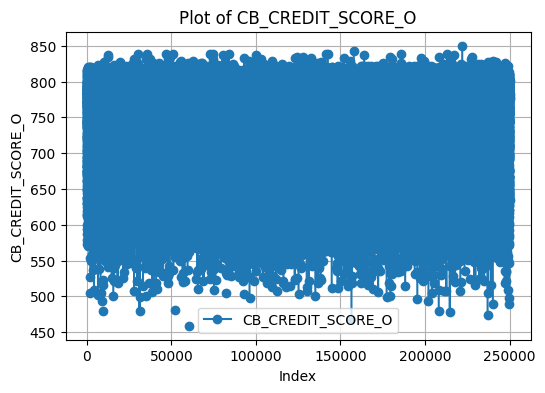

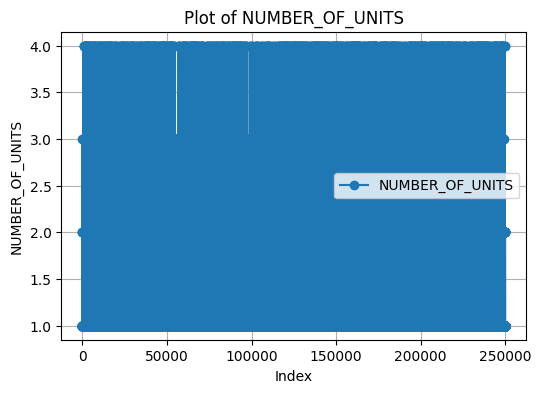

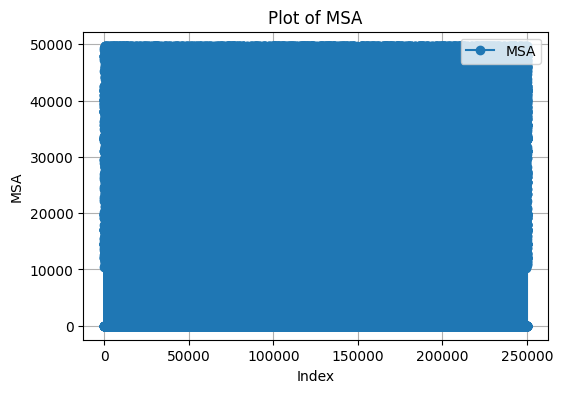

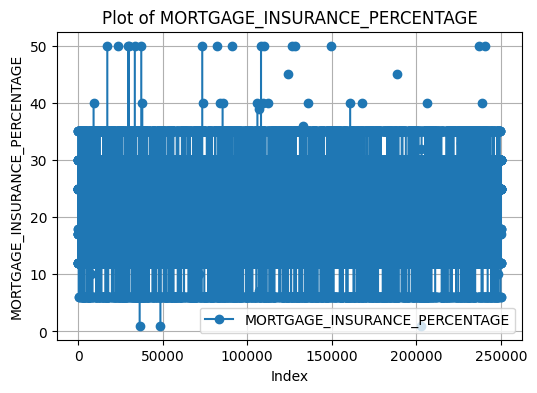

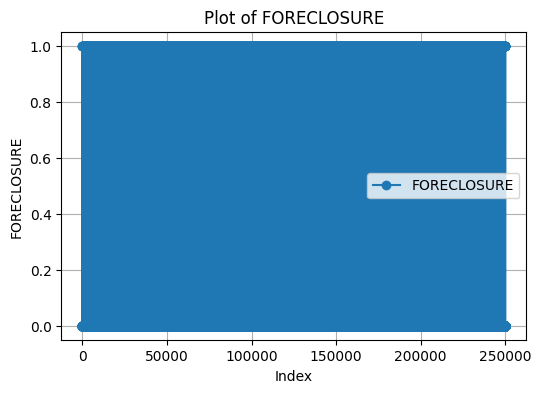

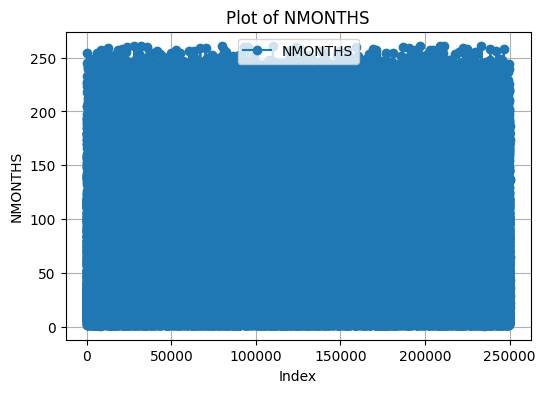

In [582]:
numerical_columns = df.select_dtypes(include=[np.number])

# Plot each numerical column
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    plt.plot(numerical_columns[column], marker='o', linestyle='-', label=column)
    plt.title(f"Plot of {column}")
    plt.xlabel("Index")
    plt.ylabel(column)
    plt.legend()
    plt.grid(True)
    plt.show()

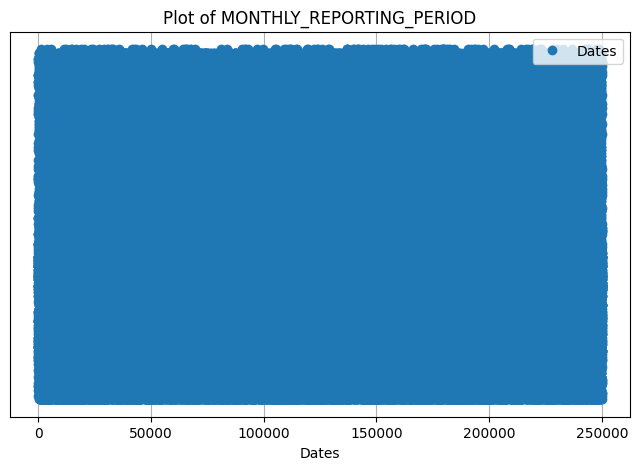

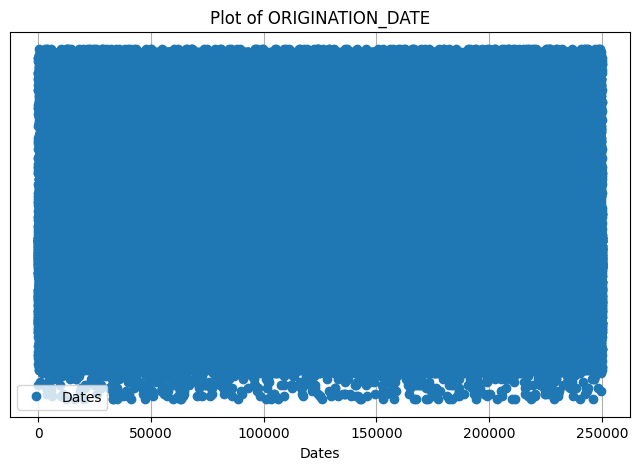

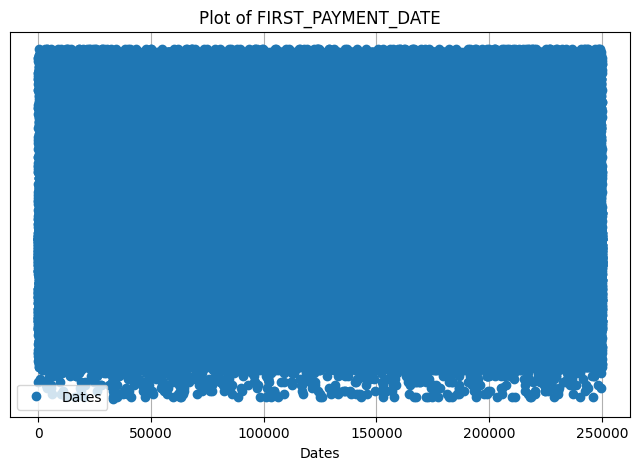

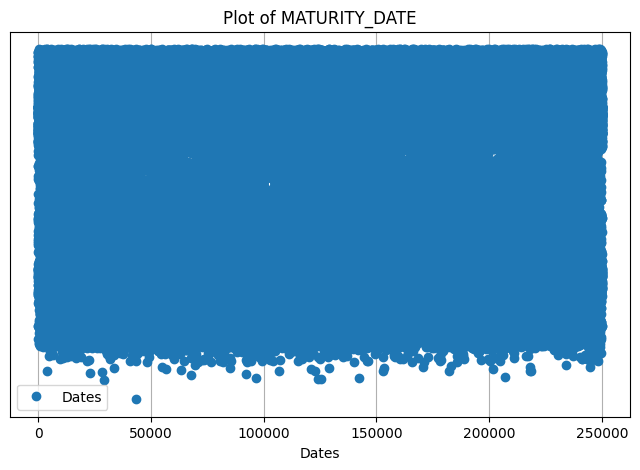

In [583]:
datetime_columns = df.select_dtypes(include=['datetime'])
for column in datetime_columns:
  plt.figure(figsize=(8, 5))
  plt.plot(datetime_columns[column],  'o', label='Dates')
  plt.title(f"Plot of {column}")
  plt.xlabel("Dates")
  plt.yticks([])
  plt.legend()
  plt.grid(True)
  plt.show()

# **Preparing the data**

Dropping the N_Months and foreclousre from the dataset


In [584]:
y_train = df[['NMONTHS','FORECLOSURE']]
X_train = df.drop(columns=['NMONTHS','FORECLOSURE'])

In [585]:
X_train.shape

(250000, 28)

In [586]:
y_train.iloc[:, 0]

,NMONTHS
0,32.0
1,179.0
2,4.0
3,110.0
4,140.0
...,...
249995,43.0
249996,65.0
249997,29.0
249998,186.0


In [587]:
y_train.iloc[:, 0].mean()

57.106612

In [588]:
y_train

,NMONTHS,FORECLOSURE
0,32.0,0.0
1,179.0,0.0
2,4.0,0.0
3,110.0,0.0
4,140.0,0.0
...,...,...
249995,43.0,0.0
249996,65.0,1.0
249997,29.0,0.0
249998,186.0,0.0


Dropping Mortgage_insurance_percentage and CB_CREDIT_SCORE as both are missing more than 50 percent of hte data. SO imputaion of any sort cannot be accurate enough

In [589]:
X_train = X_train.drop(columns=['MORTGAGE_INSURANCE_PERCENTAGE','CB_CREDIT_SCORE_O'])

In [590]:
X_train['FIRST_TIME_HOME_BUYER_IND'].fillna(X_train['FIRST_TIME_HOME_BUYER_IND'].mode()[0], inplace=True)

<ipython-input-590-1eab45c5d658>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['FIRST_TIME_HOME_BUYER_IND'].fillna(X_train['FIRST_TIME_HOME_BUYER_IND'].mode()[0], inplace=True)


In [591]:
X_train['FIRST_TIME_HOME_BUYER_IND'].mode()

,FIRST_TIME_HOME_BUYER_IND
0,N


In [592]:
X_train['FIRST_TIME_HOME_BUYER_IND'].isna().sum()

0

One hot encoding the string/categorical variables


In [593]:
# List the columns you want to apply One-Hot Encoding to
columns_to_encode = ["CHANNEL", "FIRST_TIME_HOME_BUYER_IND",
                  "LOAN_PURPOSE", "PROPERTY_TYPE", "OCCUPANCY_STATUS",
                  "PROPERTY_STATE"]

# Apply One-Hot Encoding
X_train = pd.get_dummies(X_train, columns=columns_to_encode, drop_first=True)


print(X_train.shape)

(250000, 85)


In [594]:
X_train.drop(columns=['LOAN_ID'], inplace=True) # Unique for each sample

In [595]:
X_train.shape

(250000, 84)

In [596]:
X_train['ZIP_CODE_SHORT'] = pd.to_numeric(X_train['ZIP_CODE_SHORT'], errors='coerce')

In [597]:
print(X_train['ZIP_CODE_SHORT'].dtype)

int64


In [598]:
# Impute missing values in numerical columns with the mean of each column
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

# Apply mean imputation for each numerical column
X_train[numerical_columns] = X_train[numerical_columns].fillna(X_train[numerical_columns].mean())

In [599]:
nan_counts = X_train.isna().sum()
print("Number of NaNs in each column:")
nan_counts

Number of NaNs in each column:


,0
MONTHLY_REPORTING_PERIOD,0
ORIGINAL_INTEREST_RATE,0
CURRENT_INTEREST_RATE,0
ORIGINAL_UPB,0
ORIGINAL_LOAN_TERM,0
...,...
PROPERTY_STATE_VT,0
PROPERTY_STATE_WA,0
PROPERTY_STATE_WI,0
PROPERTY_STATE_WV,0


In [600]:
X_train['MATURITY_DATE']

,MATURITY_DATE
0,2030-05-01
1,2018-05-01
2,2031-07-01
3,2034-06-01
4,2017-02-01
...,...
249995,2019-12-01
249996,2037-02-01
249997,2033-08-01
249998,2032-12-01


In [601]:
X_train['ORIGINATION_DATE']

,ORIGINATION_DATE
0,2000-04-01
1,2003-04-01
2,2001-07-01
3,2004-05-01
4,2001-12-01
...,...
249995,2004-11-01
249996,2006-12-01
249997,2003-07-01
249998,2002-11-01


In [602]:
X_train['FIRST_PAYMENT_DATE']

,FIRST_PAYMENT_DATE
0,2000-06-01
1,2003-06-01
2,2001-08-01
3,2004-07-01
4,2002-03-01
...,...
249995,2005-01-01
249996,2007-03-01
249997,2003-09-01
249998,2003-01-01


In [603]:
#Encoding date time objects
datetime_columns = ["MONTHLY_REPORTING_PERIOD",
                   "ORIGINATION_DATE",
                   "FIRST_PAYMENT_DATE",
                   "MATURITY_DATE"]


def get_days_in_month(date):
    return pd.Timestamp(date).days_in_month


for col in datetime_columns:

    X_train[f'{col}_Month'] = X_train[col].dt.month
    X_train[f'{col}_Day'] = X_train[col].dt.day


    X_train[f'{col}_Month_sin'] = np.sin(2 * np.pi * X_train[f'{col}_Month'] / 12)
    X_train[f'{col}_Month_cos'] = np.cos(2 * np.pi * X_train[f'{col}_Month'] / 12)


    X_train[f'{col}_Days_in_month'] = X_train[col].apply(get_days_in_month)


    X_train[f'{col}_Day_sin'] = np.sin(2 * np.pi * X_train[f'{col}_Day'] / X_train[f'{col}_Days_in_month'])
    X_train[f'{col}_Day_cos'] = np.cos(2 * np.pi * X_train[f'{col}_Day'] / X_train[f'{col}_Days_in_month'])


print(X_train)

       MONTHLY_REPORTING_PERIOD  ORIGINAL_INTEREST_RATE  \
0                    2000-05-01                   8.250   
1                    2003-06-01                   5.000   
2                    2001-08-01                   7.750   
3                    2004-07-01                   6.750   
4                    2002-01-01                   6.250   
...                         ...                     ...   
249995               2004-12-01                   4.875   
249996               2007-02-01                   5.750   
249997               2003-07-01                   5.500   
249998               2002-12-01                   6.000   
249999               2002-11-01                   6.125   

        CURRENT_INTEREST_RATE  ORIGINAL_UPB  ORIGINAL_LOAN_TERM  \
0                       8.250       75000.0               360.0   
1                       5.000       72000.0               180.0   
2                       7.750      273000.0               360.0   
3                      

In [604]:
X_train

,MONTHLY_REPORTING_PERIOD,ORIGINAL_INTEREST_RATE,CURRENT_INTEREST_RATE,ORIGINAL_UPB,ORIGINAL_LOAN_TERM,ORIGINATION_DATE,FIRST_PAYMENT_DATE,LOAN_AGE,REM_MONTHS_LEGAL_MATURITY,REM_MONTHS_MATURITY,...,FIRST_PAYMENT_DATE_Days_in_month,FIRST_PAYMENT_DATE_Day_sin,FIRST_PAYMENT_DATE_Day_cos,MATURITY_DATE_Month,MATURITY_DATE_Day,MATURITY_DATE_Month_sin,MATURITY_DATE_Month_cos,MATURITY_DATE_Days_in_month,MATURITY_DATE_Day_sin,MATURITY_DATE_Day_cos
0,2000-05-01,8.250,8.250,75000.0,360.0,2000-04-01,2000-06-01,0.0,360.0,360.0,...,30,0.207912,0.978148,5.0,1.0,5.000000e-01,-0.866025,31.0,0.201299,0.979530
1,2003-06-01,5.000,5.000,72000.0,180.0,2003-04-01,2003-06-01,1.0,179.0,179.0,...,30,0.207912,0.978148,5.0,1.0,5.000000e-01,-0.866025,31.0,0.201299,0.979530
2,2001-08-01,7.750,7.750,273000.0,360.0,2001-07-01,2001-08-01,1.0,359.0,358.0,...,31,0.201299,0.979530,7.0,1.0,-5.000000e-01,-0.866025,31.0,0.201299,0.979530
3,2004-07-01,6.750,6.750,73000.0,360.0,2004-05-01,2004-07-01,1.0,359.0,359.0,...,31,0.201299,0.979530,6.0,1.0,1.224647e-16,-1.000000,30.0,0.207912,0.978148
4,2002-01-01,6.250,6.250,38000.0,180.0,2001-12-01,2002-03-01,-1.0,181.0,180.0,...,31,0.201299,0.979530,2.0,1.0,8.660254e-01,0.500000,28.0,0.222521,0.974928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,2004-12-01,4.875,4.875,232000.0,180.0,2004-11-01,2005-01-01,0.0,180.0,179.0,...,31,0.201299,0.979530,12.0,1.0,-2.449294e-16,1.000000,31.0,0.201299,0.979530
249996,2007-02-01,5.750,5.750,417000.0,360.0,2006-12-01,2007-03-01,0.0,360.0,359.0,...,31,0.201299,0.979530,2.0,1.0,8.660254e-01,0.500000,28.0,0.222521,0.974928
249997,2003-07-01,5.500,5.500,87000.0,360.0,2003-07-01,2003-09-01,-1.0,361.0,360.0,...,30,0.207912,0.978148,8.0,1.0,-8.660254e-01,-0.500000,31.0,0.201299,0.979530
249998,2002-12-01,6.000,6.000,130000.0,360.0,2002-11-01,2003-01-01,0.0,360.0,359.0,...,31,0.201299,0.979530,12.0,1.0,-2.449294e-16,1.000000,31.0,0.201299,0.979530


In [605]:
X_train.drop(columns=['MONTHLY_REPORTING_PERIOD',
                   "ORIGINATION_DATE",
                   "FIRST_PAYMENT_DATE",
                   "MATURITY_DATE"], inplace=True)

In [606]:
X_train

,ORIGINAL_INTEREST_RATE,CURRENT_INTEREST_RATE,ORIGINAL_UPB,ORIGINAL_LOAN_TERM,LOAN_AGE,REM_MONTHS_LEGAL_MATURITY,REM_MONTHS_MATURITY,LTV,CLTV,NUMBER_OF_BORROWERS,...,FIRST_PAYMENT_DATE_Days_in_month,FIRST_PAYMENT_DATE_Day_sin,FIRST_PAYMENT_DATE_Day_cos,MATURITY_DATE_Month,MATURITY_DATE_Day,MATURITY_DATE_Month_sin,MATURITY_DATE_Month_cos,MATURITY_DATE_Days_in_month,MATURITY_DATE_Day_sin,MATURITY_DATE_Day_cos
0,8.250,8.250,75000.0,360.0,0.0,360.0,360.0,79.0,70.379057,2.0,...,30,0.207912,0.978148,5.0,1.0,5.000000e-01,-0.866025,31.0,0.201299,0.979530
1,5.000,5.000,72000.0,180.0,1.0,179.0,179.0,33.0,33.000000,2.0,...,30,0.207912,0.978148,5.0,1.0,5.000000e-01,-0.866025,31.0,0.201299,0.979530
2,7.750,7.750,273000.0,360.0,1.0,359.0,358.0,80.0,80.000000,2.0,...,31,0.201299,0.979530,7.0,1.0,-5.000000e-01,-0.866025,31.0,0.201299,0.979530
3,6.750,6.750,73000.0,360.0,1.0,359.0,359.0,90.0,90.000000,1.0,...,31,0.201299,0.979530,6.0,1.0,1.224647e-16,-1.000000,30.0,0.207912,0.978148
4,6.250,6.250,38000.0,180.0,-1.0,181.0,180.0,31.0,31.000000,1.0,...,31,0.201299,0.979530,2.0,1.0,8.660254e-01,0.500000,28.0,0.222521,0.974928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,4.875,4.875,232000.0,180.0,0.0,180.0,179.0,80.0,80.000000,1.0,...,31,0.201299,0.979530,12.0,1.0,-2.449294e-16,1.000000,31.0,0.201299,0.979530
249996,5.750,5.750,417000.0,360.0,0.0,360.0,359.0,75.0,75.000000,2.0,...,31,0.201299,0.979530,2.0,1.0,8.660254e-01,0.500000,28.0,0.222521,0.974928
249997,5.500,5.500,87000.0,360.0,-1.0,361.0,360.0,35.0,35.000000,2.0,...,30,0.207912,0.978148,8.0,1.0,-8.660254e-01,-0.500000,31.0,0.201299,0.979530
249998,6.000,6.000,130000.0,360.0,0.0,360.0,359.0,75.0,75.000000,1.0,...,31,0.201299,0.979530,12.0,1.0,-2.449294e-16,1.000000,31.0,0.201299,0.979530


In [607]:
X = pd.concat([X_train, y_train], axis=1)

In [608]:

X.shape

(250000, 110)

In [609]:
X_cleaned = X.dropna()

In [610]:
X_cleaned.shape

(249998, 110)

In [611]:
X1 = X_cleaned.iloc[:, :-2]  # All columns except the last two
y1 = X_cleaned.iloc[:, -2]  # First target column (y1) Nmonths
y2 = X_cleaned.iloc[:, -1]  # Second target column (y2) Foreclosurew

In [612]:
X1.shape

(249998, 108)

In [613]:
y1

,NMONTHS
0,32.0
1,179.0
2,4.0
3,110.0
4,140.0
...,...
249995,43.0
249996,65.0
249997,29.0
249998,186.0


In [614]:
y1.mean()

57.107060856486854

# **Regression**

In [615]:
y1.mean()

57.107060856486854

In [616]:
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)

In [617]:
X1_scaled_df = pd.DataFrame(X1_scaled, columns=X1.columns)

In [618]:
pca = PCA(n_components=0.999)  # Retain 99.9% of variance(The aim of this was to reduce dimensionality of the data that had ballooned due to all the encoding)
X1_pca_scaled = pca.fit_transform(X1_scaled_df)
# Convert X_pca (NumPy array) to a DataFrame
X1_pca_scaled = pd.DataFrame(X1_pca_scaled, index=X1_scaled_df.index)

In [619]:
X1_pca_scaled.shape

(249998, 86)

In [526]:
# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# MAE list
mae1_list = []


for train_index, val_index in kf.split(X1_pca_scaled):

    X_train, X_val = X1_pca_scaled.iloc[train_index], X1_pca_scaled.iloc[val_index]
    y1_train, y1_val = y1.iloc[train_index], y1.iloc[val_index]


    model1 = LinearRegression()
    model1.fit(X_train, y1_train)


    y1_pred = model1.predict(X_val)
    print(y1_pred)

    mae1 = mean_absolute_error(y1_val, y1_pred)


    mae1_list.append(mae1)

avg_mae1 = sum(mae1_list) / len(mae1_list)

[66.57370202 84.24884446 64.28331043 ... 71.02977083 89.2537652
 93.21960204]
[16.09493936 82.71090073 75.11398635 ... 56.81910022 65.26400295
 68.44243017]
[84.34890563 40.5067823  85.4572121  ... 73.74245054 80.90415845
 30.07584118]
[15.36828237 54.97820726 61.5182109  ... 64.03457334 43.31595565
 67.98983922]
[42.4701802  64.59038406 43.98301322 ... 97.85051101 47.67237634
 64.0598647 ]


In [527]:
print(avg_mae1)

36.1398561555762


## **Classification**

In [528]:
y2_counts = y2.value_counts()

num_zeros = y2_counts.get(0, 0)  #  0s
num_ones = y2_counts.get(1, 0)  #  1s


print(f"Number of 0s in y2: {num_zeros}")
print(f"Number of 1s in y2: {num_ones}")

Number of 0s in y2: 244119
Number of 1s in y2: 5879


In [529]:
X_class = pd.concat([X_pca_df, y2], axis=1)

Logistic regression

In [530]:

X = X1_pca_scaled
y = y2

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, stratify=y, random_state=42)


X_train = pd.DataFrame(X_train, index=X.index[:len(X_train)], columns=X.columns)
X_test = pd.DataFrame(X_test, index=X.index[len(X_train):], columns=X.columns)


log_reg = LogisticRegression(random_state=42, max_iter=5000, class_weight='balanced')
log_reg.fit(X_train, y_train)


y_prob = log_reg.predict_proba(X_test)[:, 1]  # Probability of y = 1


prob_df = pd.DataFrame({    #data frame to hold the probablilities of either classs. will use this to obtain the 1000 most probabale foreclosures
    'Index': X_test.index,
    'Probability': y_prob,
    'Actual': y_test.values
})


top_1000 = prob_df.sort_values(by='Probability', ascending=False).head(1000)


top_1000_indices = top_1000['Index'].tolist()


true_labels = top_1000['Actual']
predicted_labels = [1] * len(top_1000)


f1 = f1_score(true_labels, predicted_labels)


print(f"F1 Score for top 1000 foreclosures: {f1}")
print(f"Top 1000 indices: {top_1000_indices}")

F1 Score for top 1000 foreclosures: 0.3079526226734349
Top 1000 indices: [159102, 134807, 233790, 126883, 223351, 192977, 187427, 207718, 192341, 244212, 204713, 191346, 144572, 153747, 178044, 221145, 146471, 145420, 159093, 241300, 146513, 128077, 128533, 130245, 228029, 177396, 169579, 165102, 149007, 182117, 168508, 242261, 208051, 184263, 181287, 160822, 195679, 161484, 135544, 242937, 247611, 136873, 241072, 240345, 249842, 249809, 219705, 127485, 190318, 187835, 222985, 172117, 140089, 146287, 186022, 192890, 167580, 131680, 216104, 230133, 207512, 140141, 204467, 240532, 171009, 221238, 181544, 211713, 239487, 233815, 188430, 242031, 229316, 239234, 191206, 204975, 213520, 131664, 146206, 218813, 186990, 184143, 128791, 229575, 161420, 138331, 127865, 139108, 151023, 185419, 199495, 229006, 176713, 241835, 156047, 182008, 176173, 193029, 200317, 159147, 214152, 221564, 136413, 182268, 177832, 227932, 166825, 143466, 247411, 170881, 135801, 197145, 138614, 209251, 238869, 129105

In [442]:
correct_predictions = true_labels.sum()  # As true_labels is binary, sum() gives count of 1s

print(f"Number of correct predictions in the top 1000: {correct_predictions}")

Number of correct predictions in the top 1000: 182.0


Random Forest

In [443]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, stratify=y, random_state=42)


X_train = pd.DataFrame(X_train, index=X.index[:len(X_train)], columns=X.columns)
X_test = pd.DataFrame(X_test, index=X.index[len(X_train):], columns=X.columns)


rf_clf = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
rf_clf.fit(X_train, y_train)


y_prob = rf_clf.predict_proba(X_test)[:, 1]


prob_df = pd.DataFrame({
    'Index': X_test.index,
    'Probability': y_prob,
    'Actual': y_test.values
})

top_1000 = prob_df.sort_values(by='Probability', ascending=False).head(1000)


top_1000_indices = top_1000['Index'].tolist()


true_labels = top_1000['Actual']
predicted_labels = [1] * len(top_1000)


f1 = f1_score(true_labels, predicted_labels)


correct_predictions = true_labels.sum()


print(f"F1 Score for top 1000 foreclosures: {f1}")
print(f"Number of correct predictions in the top 1000: {correct_predictions}")
print(f"Top 1000 indices: {top_1000_indices}")

F1 Score for top 1000 foreclosures: 0.3050847457627119
Number of correct predictions in the top 1000: 180.0
Top 1000 indices: [209403, 162357, 126611, 190147, 204975, 170765, 159493, 214470, 167865, 193855, 179397, 244357, 140439, 213085, 142767, 224947, 228580, 229006, 182920, 132916, 213520, 211715, 230944, 235396, 188425, 141756, 217789, 125636, 169594, 229632, 236551, 158109, 145785, 130460, 239697, 129426, 232875, 192341, 151450, 236423, 127142, 129105, 153228, 212154, 189206, 156902, 141791, 238793, 244569, 158622, 136374, 162642, 195136, 217868, 162473, 132455, 157071, 248585, 142201, 126462, 174603, 231243, 136869, 202998, 131002, 241139, 229553, 238264, 174386, 190539, 142810, 241404, 157951, 162292, 217672, 129963, 224953, 232873, 245451, 126831, 142602, 174432, 190215, 240964, 181957, 219604, 125241, 171662, 232702, 158035, 233017, 219512, 144893, 206604, 159349, 176902, 228878, 184233, 157634, 146027, 139108, 227748, 239494, 247499, 187799, 190257, 169736, 244411, 246164, 1

Trying out LDA and naive bayes

In [444]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, stratify=y, random_state=42)


lda_clf = LinearDiscriminantAnalysis()
nb_clf = GaussianNB()


lda_clf.fit(X_train, y_train)


nb_clf.fit(X_train, y_train)


y_prob_lda = lda_clf.predict_proba(X_test)[:, 1]


y_prob_nb = nb_clf.predict_proba(X_test)[:, 1]

prob_df_lda = pd.DataFrame({
    'Index': range(len(y_test)),
    'Probability': y_prob_lda,
    'Actual': y_test.values
})

prob_df_nb = pd.DataFrame({
    'Index': range(len(y_test)),
    'Probability': y_prob_nb,
    'Actual': y_test.values
})

top_1000_lda = prob_df_lda.sort_values(by='Probability', ascending=False).head(1000)
top_1000_nb = prob_df_nb.sort_values(by='Probability', ascending=False).head(1000)


true_labels_lda = top_1000_lda['Actual']
predicted_labels_lda = [1] * len(top_1000_lda)
f1_lda = f1_score(true_labels_lda, predicted_labels_lda)
correct_lda = true_labels_lda.sum()


true_labels_nb = top_1000_nb['Actual']
predicted_labels_nb = [1] * len(top_1000_nb)
f1_nb = f1_score(true_labels_nb, predicted_labels_nb)
correct_nb = true_labels_nb.sum()

print(f"LDA: F1 Score for top 1000 foreclosures: {f1_lda}")
print(f"LDA: Number of correct predictions in the top 1000: {correct_lda}")

print(f"Naive Bayes: F1 Score for top 1000 foreclosures: {f1_nb}")
print(f"Naive Bayes: Number of correct predictions in the top 1000: {correct_nb}")

LDA: F1 Score for top 1000 foreclosures: 0.30220713073005095
LDA: Number of correct predictions in the top 1000: 178.0
Naive Bayes: F1 Score for top 1000 foreclosures: 0.16681943171402383
Naive Bayes: Number of correct predictions in the top 1000: 91.0


# **Predicting on test data**

In [621]:
df_test = read_data('/content/test_predsBATG.csv')

In [622]:
df_test['FIRST_TIME_HOME_BUYER_IND'].fillna('N', inplace=True)

<ipython-input-622-24a17e9cbd79>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['FIRST_TIME_HOME_BUYER_IND'].fillna('N', inplace=True)


In [623]:
df_test = df_test.drop(columns=['MORTGAGE_INSURANCE_PERCENTAGE','CB_CREDIT_SCORE_O'])

In [624]:
df_test['FIRST_TIME_HOME_BUYER_IND'].isna().sum()

0

In [625]:

columns_to_encode = ["CHANNEL", "FIRST_TIME_HOME_BUYER_IND",
                  "LOAN_PURPOSE", "PROPERTY_TYPE", "OCCUPANCY_STATUS",
                  "PROPERTY_STATE"]


df_test = pd.get_dummies(df_test, columns=columns_to_encode, drop_first=True)


print(df_test.shape)

(100000, 85)


In [626]:
df_test['ZIP_CODE_SHORT'] = pd.to_numeric(df_test['ZIP_CODE_SHORT'], errors='coerce')

In [627]:
#Imputing mean from X_train
numerical_columns_train = X_train.select_dtypes(include=['float64', 'int64']).columns
numerical_columns_test = df_test.select_dtypes(include=['float64', 'int64']).columns


common_numerical_columns = numerical_columns_train.intersection(numerical_columns_test)


df_test[common_numerical_columns] = df_test[common_numerical_columns].fillna(X_train[common_numerical_columns].mean())


print(df_test[common_numerical_columns].isnull().sum())

ORIGINAL_INTEREST_RATE       0
CURRENT_INTEREST_RATE        0
ORIGINAL_UPB                 0
ORIGINAL_LOAN_TERM           0
LOAN_AGE                     0
REM_MONTHS_LEGAL_MATURITY    0
REM_MONTHS_MATURITY          0
LTV                          0
CLTV                         0
NUMBER_OF_BORROWERS          0
DTI                          0
B_CREDIT_SCORE_O             0
NUMBER_OF_UNITS              0
MSA                          0
ZIP_CODE_SHORT               0
dtype: int64


In [628]:

datetime_columns = ["MONTHLY_REPORTING_PERIOD",
                   "ORIGINATION_DATE",
                   "FIRST_PAYMENT_DATE",
                   "MATURITY_DATE"]

# Encoding dates into days and time sin and cos
def get_days_in_month(date):
    return pd.Timestamp(date).days_in_month


for col in datetime_columns:

    df_test[f'{col}_Month'] = df_test[col].dt.month
    df_test[f'{col}_Day'] =df_test[col].dt.day


    df_test[f'{col}_Month_sin'] = np.sin(2 * np.pi * df_test[f'{col}_Month'] / 12)
    df_test[f'{col}_Month_cos'] = np.cos(2 * np.pi * df_test[f'{col}_Month'] / 12)


    df_test[f'{col}_Days_in_month'] = df_test[col].apply(get_days_in_month)


    df_test[f'{col}_Day_sin'] = np.sin(2 * np.pi * df_test[f'{col}_Day'] / df_test[f'{col}_Days_in_month'])
    df_test[f'{col}_Day_cos'] = np.cos(2 * np.pi * df_test[f'{col}_Day'] / df_test[f'{col}_Days_in_month'])


print(df_test)

            LOAN_ID MONTHLY_REPORTING_PERIOD  ORIGINAL_INTEREST_RATE  \
0      BICGHBJHDBAA               2002-02-01                   7.250   
1      JIGECHDCHGCD               2002-01-01                   6.375   
2      DIIDGEJAEEFF               2002-07-01                   6.625   
3      JEJAGDGGJCCH               2001-05-01                   6.625   
4      FJFFJGFFDDJF               2002-02-01                   6.750   
...             ...                      ...                     ...   
99995  JHFHFBFFBBIF               2003-01-01                   5.875   
99996  HIHFEDFCADDI               2005-11-01                   5.875   
99997  HGJBHICAJJII               2000-04-01                   8.625   
99998  JIEAJEJAHACB               2002-10-01                   5.750   
99999  FGDFJCEBFEAG               2002-04-01                   6.875   

       CURRENT_INTEREST_RATE  ORIGINAL_UPB  ORIGINAL_LOAN_TERM  \
0                      7.250      211000.0               360.0   
1  

In [629]:
df_test.drop(columns=['MONTHLY_REPORTING_PERIOD',
                   "ORIGINATION_DATE",
                   "FIRST_PAYMENT_DATE",
                   "MATURITY_DATE"], inplace=True)

In [630]:
df_test.head()


,LOAN_ID,ORIGINAL_INTEREST_RATE,CURRENT_INTEREST_RATE,ORIGINAL_UPB,ORIGINAL_LOAN_TERM,LOAN_AGE,REM_MONTHS_LEGAL_MATURITY,REM_MONTHS_MATURITY,LTV,CLTV,...,FIRST_PAYMENT_DATE_Days_in_month,FIRST_PAYMENT_DATE_Day_sin,FIRST_PAYMENT_DATE_Day_cos,MATURITY_DATE_Month,MATURITY_DATE_Day,MATURITY_DATE_Month_sin,MATURITY_DATE_Month_cos,MATURITY_DATE_Days_in_month,MATURITY_DATE_Day_sin,MATURITY_DATE_Day_cos
0,BICGHBJHDBAA,7.250,7.250,211000.0,360.0,0.0,360.0,360.0,90.0,90.0,...,31,0.201299,0.979530,2,1,0.866025,0.500000,29,0.214970,0.976621
1,JIGECHDCHGCD,6.375,6.375,186000.0,360.0,0.0,360.0,360.0,80.0,80.0,...,28,0.222521,0.974928,1,1,0.500000,0.866025,31,0.201299,0.979530
2,DIIDGEJAEEFF,6.625,6.625,251000.0,360.0,0.0,360.0,360.0,86.0,86.0,...,31,0.201299,0.979530,7,1,-0.500000,-0.866025,31,0.201299,0.979530
3,JEJAGDGGJCCH,6.625,6.625,92000.0,360.0,0.0,360.0,359.0,80.0,80.0,...,30,0.207912,0.978148,5,1,0.500000,-0.866025,31,0.201299,0.979530
4,FJFFJGFFDDJF,6.750,6.750,60000.0,360.0,1.0,359.0,358.0,88.0,88.0,...,28,0.222521,0.974928,1,1,0.500000,0.866025,31,0.201299,0.979530


In [631]:
loan_Id = df_test['LOAN_ID']

In [632]:
loan_Id

,LOAN_ID
0,BICGHBJHDBAA
1,JIGECHDCHGCD
2,DIIDGEJAEEFF
3,JEJAGDGGJCCH
4,FJFFJGFFDDJF
...,...
99995,JHFHFBFFBBIF
99996,HIHFEDFCADDI
99997,HGJBHICAJJII
99998,JIEAJEJAHACB


In [633]:
df_test = df_test.drop(columns=['LOAN_ID'])

In [634]:
df_test

,ORIGINAL_INTEREST_RATE,CURRENT_INTEREST_RATE,ORIGINAL_UPB,ORIGINAL_LOAN_TERM,LOAN_AGE,REM_MONTHS_LEGAL_MATURITY,REM_MONTHS_MATURITY,LTV,CLTV,NUMBER_OF_BORROWERS,...,FIRST_PAYMENT_DATE_Days_in_month,FIRST_PAYMENT_DATE_Day_sin,FIRST_PAYMENT_DATE_Day_cos,MATURITY_DATE_Month,MATURITY_DATE_Day,MATURITY_DATE_Month_sin,MATURITY_DATE_Month_cos,MATURITY_DATE_Days_in_month,MATURITY_DATE_Day_sin,MATURITY_DATE_Day_cos
0,7.250,7.250,211000.0,360.0,0.0,360.0,360.0,90.0,90.0,2.0,...,31,0.201299,0.979530,2,1,0.866025,0.500000,29,0.214970,0.976621
1,6.375,6.375,186000.0,360.0,0.0,360.0,360.0,80.0,80.0,2.0,...,28,0.222521,0.974928,1,1,0.500000,0.866025,31,0.201299,0.979530
2,6.625,6.625,251000.0,360.0,0.0,360.0,360.0,86.0,86.0,2.0,...,31,0.201299,0.979530,7,1,-0.500000,-0.866025,31,0.201299,0.979530
3,6.625,6.625,92000.0,360.0,0.0,360.0,359.0,80.0,80.0,1.0,...,30,0.207912,0.978148,5,1,0.500000,-0.866025,31,0.201299,0.979530
4,6.750,6.750,60000.0,360.0,1.0,359.0,358.0,88.0,88.0,1.0,...,28,0.222521,0.974928,1,1,0.500000,0.866025,31,0.201299,0.979530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,5.875,5.875,231000.0,360.0,2.0,358.0,358.0,59.0,59.0,2.0,...,31,0.201299,0.979530,11,1,-0.500000,0.866025,30,0.207912,0.978148
99996,5.875,5.875,50000.0,120.0,0.0,120.0,119.0,23.0,23.0,1.0,...,31,0.201299,0.979530,11,1,-0.500000,0.866025,30,0.207912,0.978148
99997,8.625,8.625,88000.0,360.0,0.0,360.0,360.0,80.0,80.0,2.0,...,31,0.201299,0.979530,4,1,0.866025,-0.500000,30,0.207912,0.978148
99998,5.750,5.750,90000.0,240.0,0.0,240.0,240.0,70.0,70.0,2.0,...,30,0.207912,0.978148,10,1,-0.866025,0.500000,31,0.201299,0.979530


## **Test Data pre precoessing**

In [635]:
df_test_scaled = scaler.transform(df_test)


In [636]:
df_test_scaled_df = pd.DataFrame(df_test_scaled, columns=df_test.columns)

In [637]:
df_test_pca_scaled = pca.transform(df_test_scaled_df)

df_test_pca_scaled = pd.DataFrame(df_test_pca_scaled, index=df_test_scaled_df.index)

In [638]:
df_test_pca_scaled.shape

(100000, 86)

In [639]:
X1_pca_scaled.shape

(249998, 86)

## **Classification**

Using logistic regression

In [640]:
log_reg = LogisticRegression(random_state=42, max_iter=5000, class_weight='balanced')
log_reg.fit(X1_pca_scaled, y2)


y_prob = log_reg.predict_proba(df_test_pca_scaled)[:, 1]


prob_df = pd.DataFrame({
    'Index': df_test_pca_scaled.index,
    'Probability': y_prob,

})


top_1000 = prob_df.sort_values(by='Probability', ascending=False).head(1000)

#Get indices of the top 1000 predictions
top_1000_indices = top_1000['Index'].tolist()

In [641]:
top_1000_indices

[91334,
 76938,
 5403,
 99554,
 38402,
 45389,
 58821,
 58280,
 24424,
 8145,
 7491,
 99613,
 24293,
 9704,
 32287,
 68211,
 8622,
 24529,
 63637,
 47185,
 29336,
 26856,
 9120,
 56396,
 50470,
 31455,
 63815,
 33412,
 96391,
 80512,
 90732,
 94088,
 48588,
 58442,
 47323,
 36004,
 51507,
 8272,
 21840,
 44904,
 88964,
 11488,
 17965,
 53146,
 96097,
 26238,
 38914,
 81778,
 3356,
 35682,
 24712,
 86065,
 9117,
 27542,
 62021,
 75377,
 12299,
 40670,
 10209,
 76722,
 49611,
 40713,
 81285,
 57428,
 54724,
 42817,
 53673,
 63522,
 95850,
 35416,
 23148,
 59905,
 35080,
 67819,
 2574,
 18726,
 84236,
 44340,
 33625,
 95185,
 97563,
 91782,
 70980,
 95184,
 1640,
 16978,
 54151,
 18963,
 93506,
 79529,
 30112,
 10881,
 39690,
 8224,
 37511,
 38419,
 40021,
 580,
 96581,
 51420,
 15333,
 27137,
 67408,
 31412,
 23195,
 85008,
 36757,
 85473,
 96342,
 12923,
 62861,
 19878,
 99866,
 7813,
 16828,
 4872,
 22559,
 90406,
 44411,
 76874,
 1385,
 46505,
 42291,
 21573,
 55942,
 61669,
 9440,
 5

In [642]:
len(top_1000_indices)

1000

In [643]:
foreclosures = np.zeros(len(loan_Id), dtype=int)

for i in top_1000_indices:
    foreclosures[i] = 1
foreclosures = pd.DataFrame(foreclosures)

result = pd.concat([loan_Id, foreclosures], axis=1)

result.head()


,LOAN_ID,0
0,BICGHBJHDBAA,0
1,JIGECHDCHGCD,0
2,DIIDGEJAEEFF,0
3,JEJAGDGGJCCH,0
4,FJFFJGFFDDJF,0


In [644]:
counts = result.iloc[:, 1].value_counts()

In [645]:
print(counts)

0
0    99000
1     1000
Name: count, dtype: int64


In [647]:
result.iloc[4648]

,4648
LOAN_ID,IGBCHEGFHHFI
0,1


## **Regression**

In [648]:

model1 = LinearRegression()


model1.fit(X1_pca_scaled, y1)

y_pred = model1.predict(df_test_pca_scaled)

print(y_pred)

[35.04048852 39.07390295 42.11595286 ... 30.72219006 75.43024622
 31.03725397]


In [670]:
result['NMONTHS'] = y_pred

In [685]:
result

,LOAN_ID,FORECLOSURES,NMONTHS
0,BICGHBJHDBAA,0,35.040489
1,JIGECHDCHGCD,0,39.073903
2,DIIDGEJAEEFF,0,42.115953
3,JEJAGDGGJCCH,0,56.685625
4,FJFFJGFFDDJF,0,61.774064
...,...,...,...
99995,JHFHFBFFBBIF,0,55.799662
99996,HIHFEDFCADDI,0,66.446106
99997,HGJBHICAJJII,0,30.722190
99998,JIEAJEJAHACB,0,75.430246


In [686]:
result.iloc[3]

,3
LOAN_ID,JEJAGDGGJCCH
FORECLOSURES,0
NMONTHS,56.685625


In [691]:

result = result.rename(columns={'FORECLOSURES': 'FORECLOSURE'})
result = result.drop(columns=['y_pred'], errors='ignore')

In [692]:
result

,LOAN_ID,FORECLOSURE,NMONTHS
0,BICGHBJHDBAA,0,35.040489
1,JIGECHDCHGCD,0,39.073903
2,DIIDGEJAEEFF,0,42.115953
3,JEJAGDGGJCCH,0,56.685625
4,FJFFJGFFDDJF,0,61.774064
...,...,...,...
99995,JHFHFBFFBBIF,0,55.799662
99996,HIHFEDFCADDI,0,66.446106
99997,HGJBHICAJJII,0,30.722190
99998,JIEAJEJAHACB,0,75.430246


In [693]:
result.iloc[4648]

,4648
LOAN_ID,IGBCHEGFHHFI
FORECLOSURE,1
NMONTHS,80.768852


In [694]:
result

,LOAN_ID,FORECLOSURE,NMONTHS
0,BICGHBJHDBAA,0,35.040489
1,JIGECHDCHGCD,0,39.073903
2,DIIDGEJAEEFF,0,42.115953
3,JEJAGDGGJCCH,0,56.685625
4,FJFFJGFFDDJF,0,61.774064
...,...,...,...
99995,JHFHFBFFBBIF,0,55.799662
99996,HIHFEDFCADDI,0,66.446106
99997,HGJBHICAJJII,0,30.722190
99998,JIEAJEJAHACB,0,75.430246


In [695]:
result.to_csv('resultF.csv', index=False)

In [696]:
result.to_csv('resultT.csv', index=True)